# Предварительный анализ тарифов абонентов «Мегалайн»

Нам предстоит провести предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Мы проанализируем поведение клиентов и попытаемся сделать вывод, какой тариф лучше. Анализ будет включать и  статистическую оценку значимости полученных результатов.

Описание предоставленных данных:
- Таблица users (информация о пользователях):
    - user_id — уникальный идентификатор пользователя
    - first_name — имя пользователя
    - last_name — фамилия пользователя
    - age — возраст пользователя (годы)
    - reg_date — дата подключения тарифа (день, месяц, год)
    - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    - city — город проживания пользователя
    - tariff — название тарифного плана
- Таблица calls (информация о звонках):
    - id — уникальный номер звонка
    - call_date — дата звонка
    - duration — длительность звонка в минутах
    - user_id — идентификатор пользователя, сделавшего звонок
- Таблица messages (информация о сообщениях):
    - id — уникальный номер сообщения
    - message_date — дата сообщения
    - user_id — идентификатор пользователя, отправившего сообщение
- Таблица internet (информация об интернет-сессиях):
    - id — уникальный номер сессии
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - session_date — дата интернет-сессии
    - user_id — идентификатор пользователя
- Таблица tariffs (информация о тарифах):
    - tariff_name — название тарифа
    - rub_monthly_fee — ежемесячная абонентская плата в рублях
    - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    - messages_included — количество сообщений в месяц, включённых в абонентскую плату
    - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## 1. Извлечение и знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
data = {
    'users'    : users,
    'calls'    : calls,
    'internet' : internet,
    'messages' : messages,
    'tariffs'  : tariffs,
}

In [3]:
for table in data:
    print('{:-^100}'.format(table))
    display(data[table].head())
    display(data[table].info())
    display(data[table].describe())
    

-----------------------------------------------users------------------------------------------------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


-----------------------------------------------calls------------------------------------------------


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


----------------------------------------------internet----------------------------------------------


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


----------------------------------------------messages----------------------------------------------


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


----------------------------------------------tariffs-----------------------------------------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


##  1. Выводы:

#### Пропуски, объем данных
Данные полны, пропусков нет (кроме столбца users.churn_date, но из описания данных понятно, что это нормально). 

Размер таблиц следующий:

| Таблица     	| Число строк 	|
|-------------	|-----------:	|
| users      	|       500 	|
| calls       	|    202607 	|
| internet    	|    149396 	|
| messages    	|    123036 	|
| tarriffs    	|         2 	|

#### Требуемые преобразования

- Столбец user_id позволяет группировать данные по пользователям в каждой таблице и объединять из разных таблиц для дальнейшего анализа, тип int, с ним все в порядке.

- Все столбцы с датами в таблицах надо преобразовать в тип datetime.

- Статистики для количественных данных на этом этапе не вызывают вопросов, за исключением: 
    - Минимальные значения равны 0 для данных calls.duration и messages.mb_used. 
    - Кроме того, 1 квартиль в данных calls.duration равна 1.3, что говорит об очень большом кол-ве данных менее 1.3 мин, потенциально может быть много данных вообще с 0. 
  
  Разберемся с этим на этапе подготовки данных


##  2. Подготовка данных

### Преобразование типов

In [4]:
# Все столбцы с датами имеют в названии слово date и все даты в одинаковом представлении для разных файлов
# Воспользуемся этим и преообразуем столбцы дат во всех таблицах одним циклом
for table in data:
    for column in data[table].columns:
        if 'date' in column:
            data[table][column] = pd.to_datetime(data[table][column], format='%Y-%m-%d')
    print(data[table].info())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
m

In [5]:
# Добавим в каждую таблицу отдельный столбец, содержащий месяц :
for table in data:
    for column in data[table].columns:
        if 'date' in column:
            new_column_month = column.replace('date', 'month')
           # new_column_year = column.replace('date', 'year')
            data[table][new_column_month] = data[table][column].dt.month
           # data[table][new_column_year] = data[table][column].dt.year
    display(data[table].head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,churn_month,reg_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,NaN,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,NaN,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,NaN,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,NaN,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,NaN,5


,id,call_date,duration,user_id,call_month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,session_month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


,id,message_date,user_id,message_month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
# Все данные по абонентским тратам предоставлены за 2018 год
# Но надо проверить, какой год стоит в датах регистрации
users['reg_year'] = users['reg_date'].dt.year
users['reg_year'].value_counts()

2018    500
Name: reg_year, dtype: int64

Мы видим, что год регистрации у всех абонентов тоже только 2018, значит, год можно не учитывать во всех данных.

### Поиск потенциальных ошибок

In [7]:
calls_zero_filter = calls.duration == 0
calls[calls_zero_filter].duration.count()

39613

In [8]:
internet_zero_filter = internet.mb_used == 0
internet[internet_zero_filter].mb_used.count()

19598

Такое кол-во нулей непонятно и требует разбирательства. По условиям тарифа, даже одна секунда разговора стоит абоненту 1 минуту. Надо посмотреть, не являются ли нули следствием неправильного округления

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe0638b390>]],
      dtype=object)

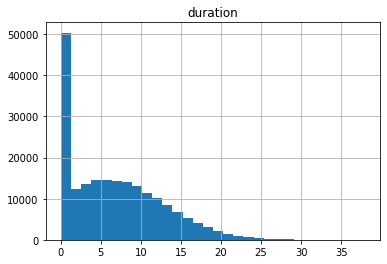

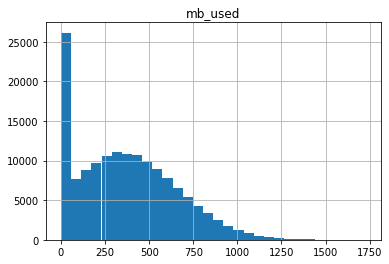

In [9]:
calls.hist('duration', bins=30)
internet.hist('mb_used', bins=30)

In [10]:
<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

не забывай подписывать обе оси на графиках# По условиям тарифов длительность разговоров и потребленный трафик округляются вверх - до 1мин и 1мБт соответственно.
# Перед округлением заменим 0 небольшими значениями, чтобы не пропали протарифицированные действия абонентов.
calls['duration_ceil'] = calls['duration']
calls.loc[calls_zero_filter, 'duration_ceil'] = .1
calls['duration_ceil'] = calls['duration_ceil'].apply(np.ceil)
calls

,id,call_date,duration,user_id,call_month,duration_ceil
0,1000_0,2018-07-25,0.00,1000,7,1.0
1,1000_1,2018-08-17,0.00,1000,8,1.0
2,1000_2,2018-06-11,2.85,1000,6,3.0
3,1000_3,2018-09-21,13.80,1000,9,14.0
4,1000_4,2018-12-15,5.18,1000,12,6.0
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,1.0
202603,1499_216,2018-10-18,18.83,1499,10,19.0
202604,1499_217,2018-11-10,10.81,1499,11,11.0
202605,1499_218,2018-10-06,4.27,1499,10,5.0


In [11]:
internet['mb_used_ceil'] = internet['mb_used']
internet.loc[internet_zero_filter, 'mb_used_ceil'] = .001
internet['mb_used_ceil'] = internet['mb_used_ceil'].apply(np.ceil)
internet

,Unnamed: 0,id,mb_used,session_date,user_id,session_month,mb_used_ceil
0,0,1000_0,112.95,2018-11-25,1000,11,113.0
1,1,1000_1,1052.81,2018-09-07,1000,9,1053.0
2,2,1000_2,1197.26,2018-06-25,1000,6,1198.0
3,3,1000_3,550.27,2018-08-22,1000,8,551.0
4,4,1000_4,302.56,2018-09-24,1000,9,303.0
...,...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10,319.0
149392,149392,1499_153,490.13,2018-12-14,1499,12,491.0
149393,149393,1499_154,0.00,2018-10-27,1499,10,1.0
149394,149394,1499_155,1246.32,2018-11-26,1499,11,1247.0


### Создание сводной таблицы 

Для решения поставленных аналитических задач нам необходимо посчитать помесячное потребление каждым абонентом всех услуг оператора: звонки, интернет, сообщения и рассчитать уплаченную какждым абонентом плату за эти услуги.

##### План расчета данных для анализа:
- Объединим таблицы users и tariffs, чтобы можно было рассчитывать плату.
- По логам звонков, интернета и сообщений сделаем сводные таблицы, группируя по пользователям и месяцам, суммируя совокупный объем для каждой услуги.
- Объединим эти сводные таблицы, получив таблицу с ежемесячным потреблением всех услуг для всех пользователей
- Объединять сводные таблицы будем таким образом, чтобы попали все месяцы, когда хоть какая-то из услуг оператора потреблялась абонентом
- Посчитаем месячную плату.

##### Важно:
У нас есть особые "граничные" месяцы - первый неполный месяц предоставления услуг и последний неполный месяц (для тех, кто перестал пользоваться услугами оператора уже в 2018г). Мы пометим такие месяцы для учета в дальнейшем анализе

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     38 non-null datetime64[ns]
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null datetime64[ns]
tariff         500 non-null object
churn_month    38 non-null float64
reg_month      500 non-null int64
reg_year       500 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 43.1+ KB


In [13]:
# сначала добавим к каждому user_id данные из тарифного плана, необходимые для расчета выручки
users_tariff = users[['user_id', 'tariff', 'churn_month', 'reg_month']]
users_tariff = users_tariff.merge(tariffs, left_on='tariff', right_on='tariff_name')
users_tariff.head(5)

,user_id,tariff,churn_month,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,ultra,NaN,5,1000,30720,3000,1950,150,1,1,ultra
1,1003,ultra,NaN,8,1000,30720,3000,1950,150,1,1,ultra
2,1004,ultra,NaN,5,1000,30720,3000,1950,150,1,1,ultra
3,1013,ultra,NaN,11,1000,30720,3000,1950,150,1,1,ultra
4,1016,ultra,NaN,11,1000,30720,3000,1950,150,1,1,ultra


In [14]:
# у нас есть NaN в столбце churn_month, которые соответствуют пользователям, 
# пользовавшимися услугами вплоть до конца 2018
# поскольку мы данный столбец будем использовать только для сравнения, чтобы пометить неполные месяцы,
# проставим вместо NaN число 13, после чего преобразуем столбец к int
users_tariff['churn_month'] = users_tariff['churn_month'].fillna(13)
users_tariff['churn_month'] = users_tariff['churn_month'].astype('int')
users_tariff.head(5)

,user_id,tariff,churn_month,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,ultra,13,5,1000,30720,3000,1950,150,1,1,ultra
1,1003,ultra,13,8,1000,30720,3000,1950,150,1,1,ultra
2,1004,ultra,13,5,1000,30720,3000,1950,150,1,1,ultra
3,1013,ultra,13,11,1000,30720,3000,1950,150,1,1,ultra
4,1016,ultra,13,11,1000,30720,3000,1950,150,1,1,ultra


In [15]:
# создадим сводную таблицу звонков, группируем по user_id и месяцам, суммируем минуты, округленные вверх
calls_users_monthly = (calls
    .pivot_table(
        index=['user_id', 'call_month'], 
        values='duration_ceil', 
        aggfunc='sum')
)
calls_users_monthly.reset_index(inplace=True)
calls_users_monthly

,user_id,call_month,duration_ceil
0,1000,5,164.0
1,1000,6,187.0
2,1000,7,346.0
3,1000,8,418.0
4,1000,9,478.0
...,...,...,...
3169,1498,10,258.0
3170,1499,9,71.0
3171,1499,10,473.0
3172,1499,11,624.0


In [16]:
# создадим сводную таблицу сессий интернет, группируем по user_id и месяцам, суммируем мбт, округленные вверх
internet_users_monthly = (internet
        .pivot_table(
            index=['user_id', 'session_month'], 
            values='mb_used_ceil', 
            aggfunc='sum')
)
internet_users_monthly.reset_index(inplace=True)
internet_users_monthly

,user_id,session_month,mb_used_ceil
0,1000,5,2257.0
1,1000,6,23262.0
2,1000,7,14017.0
3,1000,8,14072.0
4,1000,9,14583.0
...,...,...,...
3198,1498,10,20614.0
3199,1499,9,1849.0
3200,1499,10,17824.0
3201,1499,11,17994.0


In [17]:
# объединяем звонки и мбт
consumption_users_monthly = (calls_users_monthly
    .merge( internet_users_monthly, 
        left_on=['user_id', 'call_month'], 
        right_on=['user_id', 'session_month'], 
        how='outer') 
)
consumption_users_monthly

,user_id,call_month,duration_ceil,session_month,mb_used_ceil
0,1000,5.0,164.0,5.0,2257.0
1,1000,6.0,187.0,6.0,23262.0
2,1000,7.0,346.0,7.0,14017.0
3,1000,8.0,418.0,8.0,14072.0
4,1000,9.0,478.0,9.0,14583.0
...,...,...,...,...,...
3209,1489,NaN,NaN,8.0,11072.0
3210,1489,NaN,NaN,9.0,17246.0
3211,1489,NaN,NaN,10.0,19599.0
3212,1489,NaN,NaN,11.0,17526.0


In [18]:
# при объединении возникли NaN, избавимся от них, для этого
# создадим новый столбец month в котором объединим значения из столбцов session_month и call_month
# в month уже не будет NaN
consumption_users_monthly['month'] = consumption_users_monthly['session_month']
filter = consumption_users_monthly['month'].isna()
consumption_users_monthly['month'] = (
    consumption_users_monthly['month']
            .where(~filter, consumption_users_monthly['call_month'])
)
# теперь заменим все NaN на нули
consumption_users_monthly = consumption_users_monthly.fillna(0)
consumption_users_monthly

,user_id,call_month,duration_ceil,session_month,mb_used_ceil,month
0,1000,5.0,164.0,5.0,2257.0,5.0
1,1000,6.0,187.0,6.0,23262.0,6.0
2,1000,7.0,346.0,7.0,14017.0,7.0
3,1000,8.0,418.0,8.0,14072.0,8.0
4,1000,9.0,478.0,9.0,14583.0,9.0
...,...,...,...,...,...,...
3209,1489,0.0,0.0,8.0,11072.0,8.0
3210,1489,0.0,0.0,9.0,17246.0,9.0
3211,1489,0.0,0.0,10.0,19599.0,10.0
3212,1489,0.0,0.0,11.0,17526.0,11.0


In [19]:
# создадим сводную таблицу сообщений, группируем по user_id и месяцам, считаем общее кол-во сообщений
messages_users_monthly = (messages
    .pivot_table(
        index=['user_id', 'message_month'], 
        values='id', 
        aggfunc='count')
)
messages_users_monthly.columns = ['messages_total']
messages_users_monthly.reset_index(inplace=True)
messages_users_monthly

,user_id,message_month,messages_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [20]:
# объединяем сводную таблицу сообщений с уже объединенной таблицей звонков и интернета
consumption_users_monthly = (consumption_users_monthly
    .merge( messages_users_monthly, 
        left_on=['user_id', 'month'], 
        right_on=['user_id', 'message_month'], 
        how='outer') 
)
consumption_users_monthly

,user_id,call_month,duration_ceil,session_month,mb_used_ceil,month,message_month,messages_total
0,1000,5.0,164.0,5.0,2257.0,5.0,5.0,22.0
1,1000,6.0,187.0,6.0,23262.0,6.0,6.0,60.0
2,1000,7.0,346.0,7.0,14017.0,7.0,7.0,75.0
3,1000,8.0,418.0,8.0,14072.0,8.0,8.0,81.0
4,1000,9.0,478.0,9.0,14583.0,9.0,9.0,57.0
...,...,...,...,...,...,...,...,...
3209,1489,0.0,0.0,8.0,11072.0,8.0,8.0,17.0
3210,1489,0.0,0.0,9.0,17246.0,9.0,9.0,32.0
3211,1489,0.0,0.0,10.0,19599.0,10.0,10.0,21.0
3212,1489,0.0,0.0,11.0,17526.0,11.0,11.0,20.0


In [21]:
# оставим только нужные столбцы
column_list = [
    'user_id',
    'duration_ceil',
    'mb_used_ceil',
    'messages_total',
    'month'
]
consumption_users_monthly = consumption_users_monthly[column_list]

In [22]:
# проверим, не появились ли "лишние" месяцы, т.е. были ли месяцы, когда какой-то абонент только отправлял сообщения,
# и не использовал звонки или интернет
consumption_users_monthly[consumption_users_monthly.month.isna()]

,user_id,duration_ceil,mb_used_ceil,messages_total,month


In [23]:
# таких строк нет, значит просто заполним все NaN 
consumption_users_monthly = consumption_users_monthly.fillna(0)
consumption_users_monthly

,user_id,duration_ceil,mb_used_ceil,messages_total,month
0,1000,164.0,2257.0,22.0,5.0
1,1000,187.0,23262.0,60.0,6.0
2,1000,346.0,14017.0,75.0,7.0
3,1000,418.0,14072.0,81.0,8.0
4,1000,478.0,14583.0,57.0,9.0
...,...,...,...,...,...
3209,1489,0.0,11072.0,17.0,8.0
3210,1489,0.0,17246.0,32.0,9.0
3211,1489,0.0,19599.0,21.0,10.0
3212,1489,0.0,17526.0,20.0,11.0


In [24]:
consumption_users_monthly = consumption_users_monthly.astype('int')
consumption_users_monthly

,user_id,duration_ceil,mb_used_ceil,messages_total,month
0,1000,164,2257,22,5
1,1000,187,23262,60,6
2,1000,346,14017,75,7
3,1000,418,14072,81,8
4,1000,478,14583,57,9
...,...,...,...,...,...
3209,1489,0,11072,17,8
3210,1489,0,17246,32,9
3211,1489,0,19599,21,10
3212,1489,0,17526,20,11


In [25]:
# для расчета помесячной месячной выручки нам надо добавить в таблицу общего потребления данные о тарифных планах абонентов
consumption_users_monthly = consumption_users_monthly.merge(users_tariff, on='user_id')
consumption_users_monthly

,user_id,duration_ceil,mb_used_ceil,messages_total,month,tariff,churn_month,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,164,2257,22,5,ultra,13,5,1000,30720,3000,1950,150,1,1,ultra
1,1000,187,23262,60,6,ultra,13,5,1000,30720,3000,1950,150,1,1,ultra
2,1000,346,14017,75,7,ultra,13,5,1000,30720,3000,1950,150,1,1,ultra
3,1000,418,14072,81,8,ultra,13,5,1000,30720,3000,1950,150,1,1,ultra
4,1000,478,14583,57,9,ultra,13,5,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0,11072,17,8,smart,13,8,50,15360,500,550,200,3,3,smart
3210,1489,0,17246,32,9,smart,13,8,50,15360,500,550,200,3,3,smart
3211,1489,0,19599,21,10,smart,13,8,50,15360,500,550,200,3,3,smart
3212,1489,0,17526,20,11,smart,13,8,50,15360,500,550,200,3,3,smart


In [26]:
# для подсчета выручки сначала создадим 3 столбца, в которые запишем объем услуг, потребленный сверх лимита
def extra_calc(table, column, column_threshold):
    new_column = column + '_extra'
    table[new_column] = table[column] - table[column_threshold]
    filter = table[new_column] < 0
    table[new_column] = table[new_column].where(~filter, 0)

    
extra_calc(consumption_users_monthly, 'mb_used_ceil', 'mb_per_month_included')
extra_calc(consumption_users_monthly, 'duration_ceil', 'minutes_included')
extra_calc(consumption_users_monthly, 'messages_total', 'messages_included')
# проверка, что не оставили отрицательные значения
consumption_users_monthly.query('mb_used_ceil_extra < 0 or duration_ceil_extra < 0 or messages_total_extra < 0')

,user_id,duration_ceil,mb_used_ceil,messages_total,month,tariff,churn_month,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,mb_used_ceil_extra,duration_ceil_extra,messages_total_extra


In [27]:
# поскольку у нас расчет дополнительного трафика идет по гигабайтам с округлением вверх, пересчитаем
consumption_users_monthly['gb_used_ceil_extra']  = consumption_users_monthly['mb_used_ceil_extra'] / 1024
consumption_users_monthly['gb_used_ceil_extra_ceil'] = consumption_users_monthly['gb_used_ceil_extra'].apply(np.ceil)
consumption_users_monthly.query('mb_used_ceil_extra != 0')

,user_id,duration_ceil,mb_used_ceil,messages_total,month,tariff,churn_month,reg_month,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,mb_used_ceil_extra,duration_ceil_extra,messages_total_extra,gb_used_ceil_extra,gb_used_ceil_extra_ceil
8,1001,444,18460,0,11,smart,13,11,50,15360,...,550,200,3,3,smart,3100,0,0,3.027344,4.0
11,1002,219,17615,11,7,smart,13,6,50,15360,...,550,200,3,3,smart,2255,0,0,2.202148,3.0
12,1002,294,20357,13,8,smart,13,6,50,15360,...,550,200,3,3,smart,4997,0,0,4.879883,5.0
13,1002,217,16724,4,9,smart,13,6,50,15360,...,550,200,3,3,smart,1364,0,0,1.332031,2.0
15,1002,250,18621,16,11,smart,13,6,50,15360,...,550,200,3,3,smart,3261,0,0,3.184570,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,1328,0,39465,7,12,ultra,13,10,1000,30720,...,1950,150,1,1,ultra,8745,0,0,8.540039,9.0
3210,1489,0,17246,32,9,smart,13,8,50,15360,...,550,200,3,3,smart,1886,0,0,1.841797,2.0
3211,1489,0,19599,21,10,smart,13,8,50,15360,...,550,200,3,3,smart,4239,0,0,4.139648,5.0
3212,1489,0,17526,20,11,smart,13,8,50,15360,...,550,200,3,3,smart,2166,0,0,2.115234,3.0


In [28]:
# теперь посчитаем ежемесячную плату
consumption_users_monthly['fee_total'] = (
    consumption_users_monthly['rub_monthly_fee'] 
    + consumption_users_monthly['gb_used_ceil_extra_ceil'] * consumption_users_monthly['rub_per_gb'] 
    + consumption_users_monthly['duration_ceil_extra'] * consumption_users_monthly['rub_per_minute'] 
    + consumption_users_monthly['messages_total_extra'] * consumption_users_monthly['rub_per_message']
)
consumption_users_monthly

,user_id,duration_ceil,mb_used_ceil,messages_total,month,tariff,churn_month,reg_month,messages_included,mb_per_month_included,...,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,mb_used_ceil_extra,duration_ceil_extra,messages_total_extra,gb_used_ceil_extra,gb_used_ceil_extra_ceil,fee_total
0,1000,164,2257,22,5,ultra,13,5,1000,30720,...,150,1,1,ultra,0,0,0,0.000000,0.0,1950.0
1,1000,187,23262,60,6,ultra,13,5,1000,30720,...,150,1,1,ultra,0,0,0,0.000000,0.0,1950.0
2,1000,346,14017,75,7,ultra,13,5,1000,30720,...,150,1,1,ultra,0,0,0,0.000000,0.0,1950.0
3,1000,418,14072,81,8,ultra,13,5,1000,30720,...,150,1,1,ultra,0,0,0,0.000000,0.0,1950.0
4,1000,478,14583,57,9,ultra,13,5,1000,30720,...,150,1,1,ultra,0,0,0,0.000000,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0,11072,17,8,smart,13,8,50,15360,...,200,3,3,smart,0,0,0,0.000000,0.0,550.0
3210,1489,0,17246,32,9,smart,13,8,50,15360,...,200,3,3,smart,1886,0,0,1.841797,2.0,950.0
3211,1489,0,19599,21,10,smart,13,8,50,15360,...,200,3,3,smart,4239,0,0,4.139648,5.0,1550.0
3212,1489,0,17526,20,11,smart,13,8,50,15360,...,200,3,3,smart,2166,0,0,2.115234,3.0,1150.0


In [29]:
# создадим boolean столбец, в котором пометим все "граничные" месяцы
consumption_users_monthly['is_margin'] = False
filter = consumption_users_monthly['month'] == consumption_users_monthly['reg_month']
consumption_users_monthly['is_margin'] = consumption_users_monthly['is_margin'].where(~filter, True)
filter = consumption_users_monthly['month'] == consumption_users_monthly['churn_month']
consumption_users_monthly['is_margin'] = consumption_users_monthly['is_margin'].where(~filter, True)
print('Общее кол-во граничных месяцев:', consumption_users_monthly['is_margin'].sum())

Общее кол-во граничных месяцев: 534


In [30]:
column_list_to_leave = [
    'user_id',  
    'duration_ceil',
    'mb_used_ceil',
    'messages_total',
    'month',
    'tariff',
    'fee_total',
    'is_margin'
]
consumption_users_monthly = consumption_users_monthly[column_list_to_leave]
consumption_users_monthly = consumption_users_monthly.rename(columns={'mb_used_ceil':'mb_total', 'duration_ceil':'minutes_total'})

In [31]:
consumption_users_monthly

,user_id,minutes_total,mb_total,messages_total,month,tariff,fee_total,is_margin
0,1000,164,2257,22,5,ultra,1950.0,True
1,1000,187,23262,60,6,ultra,1950.0,False
2,1000,346,14017,75,7,ultra,1950.0,False
3,1000,418,14072,81,8,ultra,1950.0,False
4,1000,478,14583,57,9,ultra,1950.0,False
...,...,...,...,...,...,...,...,...
3209,1489,0,11072,17,8,smart,550.0,True
3210,1489,0,17246,32,9,smart,950.0,False
3211,1489,0,19599,21,10,smart,1550.0,False
3212,1489,0,17526,20,11,smart,1150.0,False


##  3. Анализ данных

In [32]:
# определим функции для расчета дисперсии и стандартного отклонения для выборок, 
# чтобы затем их использовать в качестве параметра aggfunc при создании .pivot_table
def var_ddof(series):
    return np.var(series, ddof=1)
def std_ddof(series):
    return np.std(series, ddof=1)

# определим глобальный набор агрегаторов, поскольку будем использовать его несколько раз
agg_func_list = ['mean', std_ddof, var_ddof]
# определим глобальный словарь переименований, поскольку будем использовать его несколько раз
agg_column_dict = {
    'mean' : 'среднее',
    'std_ddof' : 'станд. откл.',
    'var_ddof' : 'дисперсия'
}
# определим глобальный список столбцов, которые мы будем исследовать
list_for_analysis = ['minutes_total', 'mb_total', 'messages_total', 'fee_total']

In [33]:
# Мы собираемся сравнивать статистику потребления услуг абонентами разных тарифных классов
# Для этого достоточно использовать одну сводную таблицу, 
# где будут агрегироваться средние, дисперсии, и стандартные отклонения для абонентов разных тарифных классов.

# Однако мы кроме того хотим дополнительно посмотреть
# не влияют ли граничные месяцы на результат нашего исследования, 
#  поэтому мы создадим функцию, которая будет возвращать требуемую нам сводную таблицу

def get_pivot_for_different_tariff(df_data_monthly):
    pvt = (df_data_monthly
           .pivot_table(
               columns='tariff', 
               values=list_for_analysis, 
               aggfunc=agg_func_list)
           )
   # переименуем и перегруппируем столбцы в полученной сводной таблице
    col_list = []
    for l_up, l_down in pvt.columns:
        l1 = agg_column_dict[l_up]
        new_col_name = (l_down, l1) # поменяем уровни местами l_up <-> l_down
        col_list.append(new_col_name)
    new_columns = pd.MultiIndex.from_tuples(col_list, names=['тариф', 'статистики'])
    pvt.columns = new_columns
    pvt = pvt.round(1)
    pvt = pvt[['smart','ultra']]
    return pvt

In [34]:
# print('{:->102}'.format(''))
print('{:*^100}'.format(' Cтатистики потребления услуг абонентами разных тарифных классов для всех данных: '))
# print('{:->102}'.format(''))
display(get_pivot_for_different_tariff(consumption_users_monthly))
filter_no_boundary = ~consumption_users_monthly.is_margin # фильтр, отбрасывающий из анализа все граничные месяцы (их чуть более 500)
print()
print('{:*^100}'.format(' Статистики в случае отбрасывания всех граничных месяцев: '))
print(f'Всего внутренних месяцев (граничные отброшены): {filter_no_boundary.sum()}')

get_pivot_for_different_tariff(consumption_users_monthly[filter_no_boundary])

********* Cтатистики потребления услуг абонентами разных тарифных классов для всех данных: *********


тариф             smart                             ultra               \
статистики      среднее станд. откл.   дисперсия  среднее станд. откл.   
fee_total        1312.5        830.9    690458.2   2071.1        378.8   
mb_total        16237.2       5879.8  34571991.1  19488.7      10097.1   
messages_total     33.4         28.2       796.8     49.4         47.8   
minutes_total     429.5        194.9     37974.8    540.8        325.7   

тариф                        
статистики        дисперсия  
fee_total          143491.2  
mb_total        101951580.7  
messages_total       2285.3  
minutes_total      106105.7


********************* Статистики в случае отбрасывания всех граничных месяцев: *********************
Всего внутренних месяцев (граничные отброшены): 2680


тариф             smart                             ultra               \
статистики      среднее станд. откл.   дисперсия  среднее станд. откл.   
fee_total        1433.4        840.8    707002.8   2093.1        409.6   
mb_total        17582.0       4905.3  24061569.0  21216.1       9478.9   
messages_total     36.2         28.7       825.5     53.0         49.0   
minutes_total     465.5        180.3     32526.1    588.4        315.1   

тариф                       
статистики       дисперсия  
fee_total         167798.7  
mb_total        89849006.8  
messages_total      2396.2  
minutes_total      99265.7

Уже можно сделать определенные выводы на основе полученных статистик, однако мы проанализируем каждую позицию расходов абонента ниже, используя не только статистики, но и гистограммы

Что касается учета граничных месяцев, то мы видим, что картина отличия абонентов одного тарифного плана от другого не меняется, однако сами распределения для каждой категории абонентов изменились:
- во-первых, немного выросли средние объемы потребляемых услуг и, соответственно, платы за услуги, что и следовало ожидать;
- во-вторых, уменьшились дисперсии (и ст. отклонения) для трафика интернет и разговоров, что также объяснимо, поскольку граничные месяцы должны искусственно занижать все средние величины и увеличивать дисперсию

In [35]:
# сгруппируем данные для построения гистограмм и вывода статистик в несколько другом виде
grouped_consumption_monthly = consumption_users_monthly.groupby('tariff')
grouped_consumption_monthly_no_boundary = consumption_users_monthly[filter_no_boundary].groupby('tariff')

Данные по всем месяцам, включая граничные


,среднее,станд. откл.,дисперсия
tariff,,,
smart,429.5,194.9,37974.8
ultra,540.8,325.7,106105.7


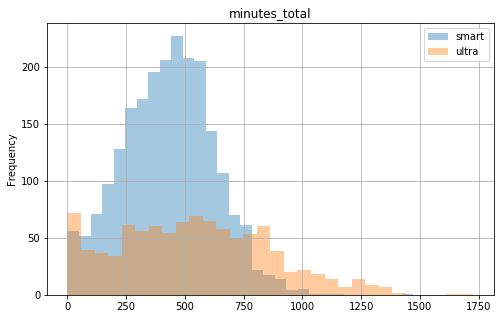

Данные только по внутренним месяцам, исключая граничные


,среднее,станд. откл.,дисперсия
tariff,,,
smart,465.5,180.3,32526.1
ultra,588.4,315.1,99265.7


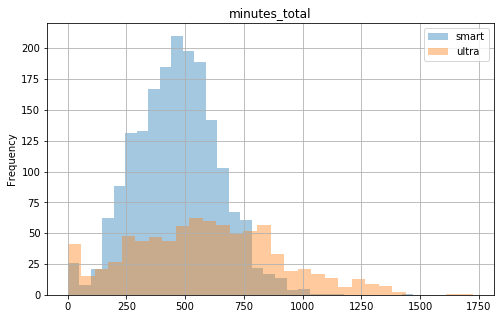

In [36]:
def show_hist_and_stat(group, col):
    # display(pivot.loc[col:col])
    pivot = group[col].agg(agg_func_list)
    pivot.columns = agg_column_dict.values()
    pivot = pivot.round(1)
    display(pivot)
    group[col].plot(kind='hist', bins=30, alpha=0.4, grid=True, title=col, legend=True, figsize=(8,5))
    plt.show()

print('Данные по всем месяцам, включая граничные')
show_hist_and_stat(grouped_consumption_monthly, list_for_analysis[0])
print('Данные только по внутренним месяцам, исключая граничные')
show_hist_and_stat(grouped_consumption_monthly_no_boundary, list_for_analysis[0])

- Распределение по количеству минут у абонентов ultra гораздо более плоское со слабо выраженным максимумом в районе 500-700 минут, и это существенно меньше лимита в 3000 минут, и вообще лимит разговоров не "выговаривает" ни один из абонентов нашей выборки. Среднее арифметическое по выборке 540-590 минут (с граничными месяцами и без них) и стандатрное отклонение в 325-315 минут (стандартное отклонение после исключения граничных месяцев меньше).
- Распределение по количеству минут у абонентов smart имеет четко выраженный максимум в р-не чуть меньше лимита 500 минут. Среднее арифметическое по выборке составляет 430-465 минут (с граничными месяцами и без них). Стандартное отклонение составляет 195-180 минут  (без пограничных месяцев ст. отклонение меньше) и это примерно на 40% меньше, чем у абонентов ultra.
- Есть небольшие локальные пики в районе близком к нулю. Причем эти пики присутствуют и в выборках без пограничных месяцев. Этот пик гораздо заметнее в распределении у абонентов ultra. Полагаю, он свидетельствует о том, что есть абоненты (причем таких в процентном отношении больше среди пользователей тарифа ultra), которые мало пользуются голосовой связью и, значит, тариф с большим лимитом их привлекает другими услугами, скорее всего большим лимитом в интернете.

In [37]:
months_low_voice = consumption_users_monthly[filter_no_boundary].query('minutes_total < 5 and tariff == "ultra"')
months_low_voice['user_id'].value_counts()

1106    8
1231    7
1091    7
1473    4
1257    3
1328    2
Name: user_id, dtype: int64

Не будем более глубоко изучать структуру потребления выделенных нами 3-5 абонентов, так как это не входит в задачи настоящего исследования, однако видно, что только от трех абонентов ultra получено 22 месяца почти нулевого голосового трафика (менее 5 минут)

Данные по всем месяцам, включая граничные


,среднее,станд. откл.,дисперсия
tariff,,,
smart,16237.2,5879.8,34571991.1
ultra,19488.7,10097.1,101951580.7


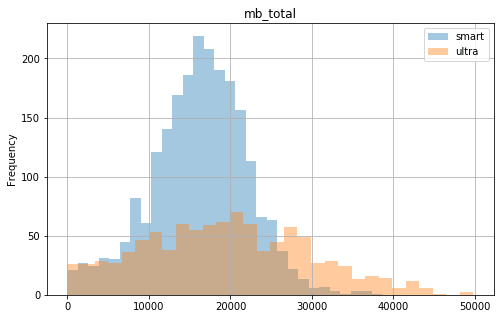

Данные только по внутренним месяцам, исключая граничные


,среднее,станд. откл.,дисперсия
tariff,,,
smart,17582.0,4905.3,24061569.0
ultra,21216.1,9478.9,89849006.8


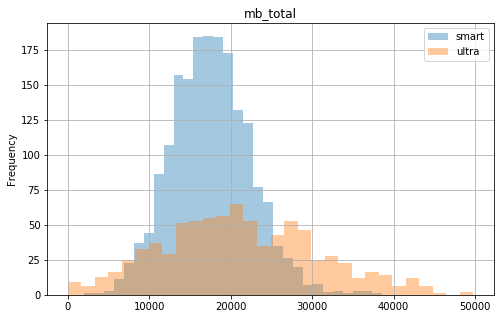

In [38]:
print('Данные по всем месяцам, включая граничные')
show_hist_and_stat(grouped_consumption_monthly, list_for_analysis[1])
print('Данные только по внутренним месяцам, исключая граничные')
show_hist_and_stat(grouped_consumption_monthly_no_boundary, list_for_analysis[1])

- Распределение по трафику у абонентов ultra гораздо более плоское со слабо выраженным максимумом в районе 21000 мБт, Среднее арифметическое по выборке 19500 - 21200 мБт (с граничными месяцами и без них) и стандатрное отклонение в 10100- 9500 мБт (стандартное отклонение после исключения граничных месяцев меньше). Среднее арифметическое по выборке меньше предоставленного тарифным планом лимита в 30 гБт, однако в отличие от голосового трафика, есть значительное кол-во месяцев, когда абоненты потребляли трафик свыше лимита.
- Распределение по трафику у абонентов smart имеет четко выраженный максимум в р-не даже немного больше лимита 15Гбт. Среднее арифметическое по выборке составляет 16250-17600 мБт (с граничными месяцами и без них). Стандартное отклонение составляет 5900-4900 мБт  (без пограничных месяцев ст. отклонение меньше) и это почти на 50% меньше, чем у абонентов ultra.
- Сравнение гистограмм для распределений с граничными месяцами и без них хорошо демонстрирует, что утолщение хвостов распределений при приближении к нулю (по сравнению с хвостами с бОльшим чем лимит трафиком) существует в значительной степени благодаря неполным месяцам. 

Данные по всем месяцам, включая граничные


,среднее,станд. откл.,дисперсия
tariff,,,
smart,33.4,28.2,796.8
ultra,49.4,47.8,2285.3


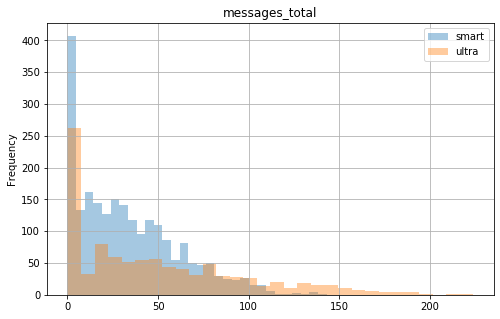

Данные только по внутренним месяцам, исключая граничные


,среднее,станд. откл.,дисперсия
tariff,,,
smart,36.2,28.7,825.5
ultra,53.0,49.0,2396.2


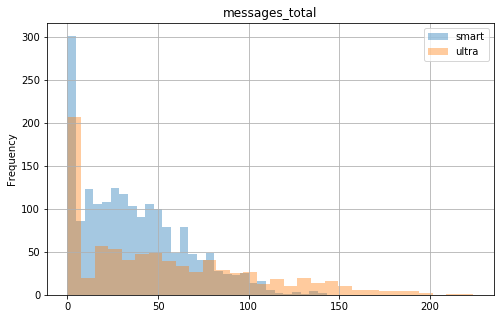

In [39]:
print('Данные по всем месяцам, включая граничные')
show_hist_and_stat(grouped_consumption_monthly, list_for_analysis[2])
print('Данные только по внутренним месяцам, исключая граничные')
show_hist_and_stat(grouped_consumption_monthly_no_boundary, list_for_analysis[2])

- Вид распределений по кол-ву отправляемых сообщений у абонентов различных тарифных планов мало отличается друг от друга. Самый большое кол-во месяцев и там и там с практически нулевым количеством отправленных сообщений. Далее замечаем второй максимум в районе чуть меньше арфметического среднего и затем длинный хвост. 
- В качестве единственного принципиального отличия, пожалуй, можно отметить, что абоненты smart довольно часто отправляют больше сообщений, чем предоставлено их тарифным лимитом в 50 сообщений. Тогда как абоненты ultra даже близко не подбираются к своему тарифному лимиту в 1000 сообщений

Данные по всем месяцам, включая граничные


,среднее,станд. откл.,дисперсия
tariff,,,
smart,1312.5,830.9,690458.2
ultra,2071.1,378.8,143491.2


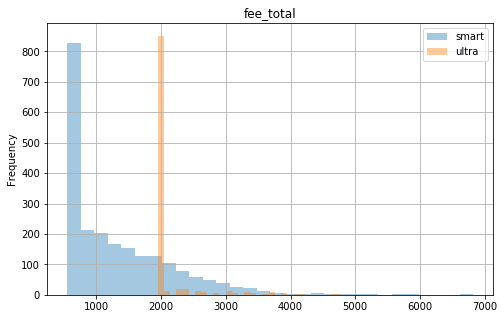

Данные только по внутренним месяцам, исключая граничные


,среднее,станд. откл.,дисперсия
tariff,,,
smart,1433.4,840.8,707002.8
ultra,2093.1,409.6,167798.7


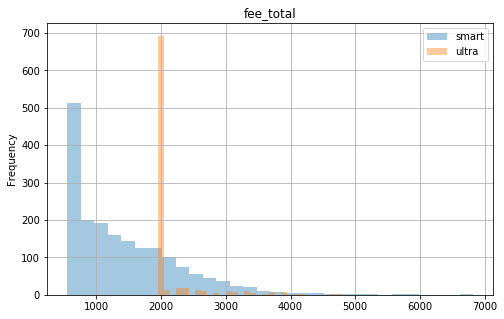

In [40]:
print('Данные по всем месяцам, включая граничные')
show_hist_and_stat(grouped_consumption_monthly, list_for_analysis[3])
print('Данные только по внутренним месяцам, исключая граничные')
show_hist_and_stat(grouped_consumption_monthly_no_boundary, list_for_analysis[3])

Распределения по абонентской плате выглядят совершенно по разному. И это понятно почему. Абоненты ultra практически всегда укладываются в обязательный ежемесячный платеж в 1950 руб., тогда как абоненты smart очень часто платят сверх обязательной абонентской платы в 550 руб. Мы даже видим весьма значительное число месяцев, когда абоненты smart платят больше, чем обязательный ежемесячный платеж для абонентов ultra.

## 4. Проверка гипотез

### Гипотеза о разнице средней выручки для абонентов разных тарифных планов

Нулевая гипотеза заключается в том, что средние выручки генеральных совокупностей абонентов разных тарифных планов равны. Альтернативная гипотеза является двухсторонней и заключается в том, что средние выручки не равны.

Для проверки гипотезы воспользуемся т-тестом проверки равенства средних двух генеральных совокупностей. Параметр equal_var мы будем задавать False, поскольку у нас есть серьезные причины полагать, что дисперсии для двух генеральных совокупностей абонентов разных тарифных планов отличаются друг от друга: абоненты ultra почти всегда укладываются в тарифные лимиты, а потому почти всегда платят только обязательный ежемесячный платеж, абоненты smart же очень часто превышают тот или иной лимит тарифного плана и поэтому их распределение абонентских плат должно быть гораздо более широким, с длинным хвостом. Все это хорошо демонстрируют и наши случайные выборки.

In [41]:
# Мы будем проверять несколько гипотез, причем нулевые гипотезы - равенство средних двух разных совокупностей,
# а альтернативные являются двухсторонними - отличие средних, поэтому для теста напишем функцию

def test_parity(sample_1, sample_2, name_s1, name_s2, equality_var, alpha=.05):
    print(f"Нулевая гипотеза: средняя выручка абонентов '{name_s1}' равна средней выручке абонентов '{name_s2}'")
    print('Альтернативная гипотеза: средние выручки абонентов не равны')
    results = st.ttest_ind(sample_1, sample_2, equal_var=equality_var)
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [42]:
# grouped_consumption_monthly = consumption_users_monthly.groupby('tariff')
# grouped_consumption_monthly_no_boundary = consumption_users_monthly[filter_no_boundary].groupby('tariff')

arrays = {}
for tariff, grouped_data in grouped_consumption_monthly:
    arrays[tariff] = grouped_data['fee_total']
# print(arrays)
test_parity(arrays['smart'], arrays['ultra'], 'smart', 'ultra', False)

Нулевая гипотеза: средняя выручка абонентов 'smart' равна средней выручке абонентов 'ultra'
Альтернативная гипотеза: средние выручки абонентов не равны
p-значение: 1.2496710269965528e-233
Отвергаем нулевую гипотезу


Вероятность того, что средние выручки в генеральных совокупностях равны близка к 0. 10 в минус 233 степени очень маленькое число, вероятность истинности нулевой гипотезы меньше, чем вероятность очень многих, интуитивно совершенно невероятных событий, например, вероятность случайно выиграть в шахматы у гроссмейстера человеком, который вообще не умеет играть в шахматы, значительно выше.

In [43]:
# теперь проверим гипотезу для выборок без пограничных месяцев
arrays_no_boundary = {}
for tariff, grouped_data in grouped_consumption_monthly_no_boundary:
    arrays_no_boundary[tariff] = grouped_data['fee_total']
# print(arrays)
test_parity(
    arrays_no_boundary['smart'], 
    arrays_no_boundary['ultra'], 
    'smart, no bndr. months', 
    'ultra, no bndr. months', False)

Нулевая гипотеза: средняя выручка абонентов 'smart, no bndr. months' равна средней выручке абонентов 'ultra, no bndr. months'
Альтернативная гипотеза: средние выручки абонентов не равны
p-значение: 1.0857881167859343e-144
Отвергаем нулевую гипотезу


Тоже и для выборки, с исключением граничных месяцев. Заметим, исключив граничные месяцы, мы, во-первых, сблизили арифметические средние выборок, во-вторых, уменьшили кол-во данных в выборке, но это все равно оставило вероятность нулевой гипотезы очень маленькой величиной.

### Вывод

С вероятностью близкой к единице мы можем утверждать, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. 

### Гипотеза о разнице средней выручки для абонентов Москвы и других городов

In [44]:
# добавим данные о городе из таблицы users
consumption_users_monthly_cities = consumption_users_monthly.merge(users[['user_id', 'city']], on='user_id')

In [45]:
consumption_users_monthly_cities

,user_id,minutes_total,mb_total,messages_total,month,tariff,fee_total,is_margin,city
0,1000,164,2257,22,5,ultra,1950.0,True,Краснодар
1,1000,187,23262,60,6,ultra,1950.0,False,Краснодар
2,1000,346,14017,75,7,ultra,1950.0,False,Краснодар
3,1000,418,14072,81,8,ultra,1950.0,False,Краснодар
4,1000,478,14583,57,9,ultra,1950.0,False,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,0,11072,17,8,smart,550.0,True,Санкт-Петербург
3210,1489,0,17246,32,9,smart,950.0,False,Санкт-Петербург
3211,1489,0,19599,21,10,smart,1550.0,False,Санкт-Петербург
3212,1489,0,17526,20,11,smart,1150.0,False,Санкт-Петербург


In [46]:
# мы будем анализировать в разрезе "москве - немосква", поэтому смапируем столбец city в новый столбец
filter_moscow = consumption_users_monthly_cities['city'] == 'Москва'
# print(filter_moscow.sum())
consumption_users_monthly_cities['moscow_not_moscow'] = consumption_users_monthly_cities['city'].where(filter_moscow, 'не Москва')
# до проверки гипотезы посмотрим статистики по признаку москва-не москва для разных тарифов и вообще для всех
pivot_table = (
    consumption_users_monthly_cities
    .pivot_table(
        index='moscow_not_moscow',
        columns='tariff',
        values='fee_total',
        margins=True,
        aggfunc=agg_func_list)
    .round(1)
              )
pivot_table

mean                 std_ddof                var_ddof  \
tariff              smart   ultra     All    smart  ultra    All     smart   
moscow_not_moscow                                                            
Москва             1261.5  2075.3  1561.2    762.8  353.1  753.2  581861.4   
не Москва          1323.2  2069.8  1541.2    844.3  386.3  814.5  712872.6   
All                1312.5  2071.1  1545.0    830.9  378.8  803.2  690458.2   

                                       
tariff                ultra       All  
moscow_not_moscow                      
Москва             124645.5  567332.1  
не Москва          149235.1  663465.7  
All                143491.2  645069.7

Интересный факт - средняя выручка абонентов из Москвы больше, чем средняя выручка абонентов не из Москвы (мы этого и ожидали), однако средняя выручка региональных абонентов smart выше (!), чем у москвичей. Но насколько этот факт статистически значим проверим ниже.

Итак, формулируем нулевую гипотезу - средняя выручка абонентов из Москвы и не из Москвы одинакова. Альтернативная гипотеза - средние выручки разнятся. Проверим такие гипотезы для по отдельности для абонентов smart, ultra и для всех 

In [47]:
grouped_on__cities_fee = consumption_users_monthly_cities.groupby(['moscow_not_moscow', 'tariff'])
arrays_cities = {}
for (city, tariff), grouped_data in grouped_on__cities_fee['fee_total']:
    arrays_cities[(city, tariff)] = grouped_data
# print(arrays_cities)

In [48]:
test_parity(
    arrays_cities[('Москва', 'smart')], 
    arrays_cities[('не Москва', 'smart')], 
    'Москва, smart', 
    'не Москва, smart', True)

Нулевая гипотеза: средняя выручка абонентов 'Москва, smart' равна средней выручке абонентов 'не Москва, smart'
Альтернативная гипотеза: средние выручки абонентов не равны
p-значение: 0.18512970713171997
Не получилось отвергнуть нулевую гипотезу


Вероятность почти 19%, что наблюдаемое нами различие в средних по выборкам случайно и на самом деле средние выручки генеральных совокупностей равны

In [49]:
test_parity(
    arrays_cities[('Москва', 'ultra')], 
    arrays_cities[('не Москва', 'ultra')], 
    'Москва, ultra', 
    'не Москва, ultra', True)

Нулевая гипотеза: средняя выручка абонентов 'Москва, ultra' равна средней выручке абонентов 'не Москва, ultra'
Альтернативная гипотеза: средние выручки абонентов не равны
p-значение: 0.8475623384854951
Не получилось отвергнуть нулевую гипотезу


Наблюдаемое различие в средних по выборкам для абонентов ultra с еще бОльшей вероятностью (почти 85%) может быть случайным

In [50]:
test_parity(
    arrays_cities[('Москва', 'ultra')].append(arrays_cities[('Москва', 'smart')]), 
    arrays_cities[('не Москва', 'ultra')].append(arrays_cities[('не Москва', 'smart')]), 
    'Москва', 'не Москва', True)

Нулевая гипотеза: средняя выручка абонентов 'Москва' равна средней выручке абонентов 'не Москва'
Альтернативная гипотеза: средние выручки абонентов не равны
p-значение: 0.578869733775166
Не получилось отвергнуть нулевую гипотезу


Вероятность почти 58%, что наблюдаемое нами различие в средних по выборкам случайно и на самом деле средние выручки генеральных совокупностей равны.

Теперь проверим гипотезу о равенстве средних выручек для московских и региональных абонентов, отбросив из выборок граничные месяцы

In [51]:
consumption_users_monthly_cities_no_boundary = consumption_users_monthly_cities[filter_no_boundary]
filter_moscow_no_boundary = consumption_users_monthly_cities_no_boundary['city'] == 'Москва'

In [52]:
consumption_moscow_no_boundary = consumption_users_monthly_cities_no_boundary[filter_moscow_no_boundary]
consumption_notmoscow_no_boundary = consumption_users_monthly_cities_no_boundary[~filter_moscow_no_boundary]
# print(len(consumption_users_monthly_cities_no_boundary), len(consumption_moscow_no_boundary), len(consumption_notmoscow_no_boundary))
test_parity(
    consumption_moscow_no_boundary['fee_total'], 
    consumption_notmoscow_no_boundary['fee_total'], 
    'Москва, нет граничных месяцев', 'не Москва, нет граничных месяцев', True)

Нулевая гипотеза: средняя выручка абонентов 'Москва, нет граничных месяцев' равна средней выручке абонентов 'не Москва, нет граничных месяцев'
Альтернативная гипотеза: средние выручки абонентов не равны
p-значение: 0.4449339332091159
Не получилось отвергнуть нулевую гипотезу


Вероятность почти 44.5%, что наблюдаемое нами различие в средних по выборкам (без пограничных месяцев) случайно и на самом деле средние выручки генеральных совокупностей равны.

In [53]:
consumption_users_monthly_cities_no_boundary

,user_id,minutes_total,mb_total,messages_total,month,tariff,fee_total,is_margin,city,moscow_not_moscow
1,1000,187,23262,60,6,ultra,1950.0,False,Краснодар,не Москва
2,1000,346,14017,75,7,ultra,1950.0,False,Краснодар,не Москва
3,1000,418,14072,81,8,ultra,1950.0,False,Краснодар,не Москва
4,1000,478,14583,57,9,ultra,1950.0,False,Краснодар,не Москва
5,1000,363,14717,73,10,ultra,1950.0,False,Краснодар,не Москва
...,...,...,...,...,...,...,...,...,...,...
3208,1473,0,18433,20,12,ultra,1950.0,False,Красноярск,не Москва
3210,1489,0,17246,32,9,smart,950.0,False,Санкт-Петербург,не Москва
3211,1489,0,19599,21,10,smart,1550.0,False,Санкт-Петербург,не Москва
3212,1489,0,17526,20,11,smart,1150.0,False,Санкт-Петербург,не Москва


In [54]:
pivot_table = (
    consumption_users_monthly_cities_no_boundary
    .pivot_table(
        index='moscow_not_moscow',
        columns='tariff',
        values='fee_total',
        margins=True,
        aggfunc=agg_func_list)
    .round(1)
              )
pivot_table

mean                 std_ddof                var_ddof  \
tariff              smart   ultra     All    smart  ultra    All     smart   
moscow_not_moscow                                                            
Москва             1396.0  2096.1  1660.4    771.8  379.4  734.8  595744.9   
не Москва          1441.0  2092.2  1630.4    854.2  418.6  809.8  729616.3   
All                1433.4  2093.1  1636.0    840.8  409.6  796.2  707002.8   

                                       
tariff                ultra       All  
moscow_not_moscow                      
Москва             143912.9  539861.5  
не Москва          175203.8  655739.1  
All                167798.7  633919.0

In [55]:
grouped_on__cities_fee_no_boundary = consumption_users_monthly_cities_no_boundary.groupby(['moscow_not_moscow', 'tariff'])
arrays_cities_no_boundary = {}
for (city, tariff), grouped_data in grouped_on__cities_fee_no_boundary['fee_total']:
    arrays_cities_no_boundary[(city, tariff)] = grouped_data
# print(arrays_cities)

In [56]:
# проверим дополнительно только лишь для абонентов smart
test_parity(
    arrays_cities_no_boundary[('Москва', 'smart')], 
    arrays_cities_no_boundary[('не Москва', 'smart')], 
    'Москва, smart, нет пограничных месяцев', 
    'не Москва, smart, нет пограничных месяцев', True)

Нулевая гипотеза: средняя выручка абонентов 'Москва, smart, нет пограничных месяцев' равна средней выручке абонентов 'не Москва, smart, нет пограничных месяцев'
Альтернативная гипотеза: средние выручки абонентов не равны
p-значение: 0.3881630753497912
Не получилось отвергнуть нулевую гипотезу


### Вывод

Нам не удалось опровергнуть нулевую гипотезу о том, что средние выручки московских и региональных абонентов равны. Мы проверили данную гипотезу по отдельности для абонентов разных тарифов и для всех абонентов. Можно лишь отметить, что наблюдаемое различие в средних выручках предоставленных нам выборок, может быть случайным с разной вероятностью для абонентов разных тарифов. Так, вероятность случайности этой разности для абонентов smart составляет почти 19% (что все равно достаточно много, чтобы с уверенностью говорить об отличии средних в совокупностях), а вероятность случайности для абонентов ultra составляет почти 85%. Если же смотреть выборку по всем абонентам, независимо от тарифа, вероятность случайности различий в средних по выборкам составляет почти 58%

## 5. Общие выводы

Мы проанализировали поведение абонентов, исходя из полученной выборки данных. Были продемонстрированы следующие результаты в контексте поставленных целей:
#### Анализ трат абонентов различных тарифных планов
- Распределения по количеству минут у абонентов ultra гораздо более плоское, чем у абонентов smart. Максимум выражен слабо в районе среднего арифметического по выборке, и это существенно меньше лимита в 3000 минут, и вообще лимит разговоров не "выговаривает" ни один из абонентов нашей выборки. Среднее арифметическое по выборке 540-590 минут (с граничными месяцами и без них) и стандартное отклонение в 325-315 минут (стандартное отклонение после исключения граничных месяцев меньше). Распределение по количеству минут у абонентов smart имеет четко выраженный максимум в р-не чуть меньше лимита 500 минут. Среднее арифметическое по выборке составляет 430-465 минут (с граничными месяцами и без них). Стандартное отклонение составляет 195-180 минут  (без пограничных месяцев ст. отклонение меньше) и это примерно на 40% меньше, чем у абонентов ultra.
- Есть небольшие локальные пики в районе близком к нулю. Причем эти пики присутствуют и в выборках без пограничных месяцев. Этот пик гораздо заметнее в распределении у абонентов ultra. Полагаю, он свидетельствует о том, что есть абоненты (причем таких в процентном отношении больше среди пользователей тарифа ultra), которые мало пользуются голосовой связью и, значит, тариф с большим лимитом их привлекает другими услугами, скорее всего большим лимитом в интернете.
- Распределение по трафику у абонентов ultra гораздо более плоское, чем у абонентов smart, со слабо выраженным максимумом в районе 21000 мБт, Среднее арифметическое по выборке 19500 - 21200 мБт (с граничными месяцами и без них) и стандартное отклонение в 10100- 9500 мБт (стандартное отклонение после исключения граничных месяцев меньше). Среднее арифметическое по выборке меньше предоставленного тарифным планом лимита в 30 гБт, однако в отличие от голосового трафика, есть значительное кол-во месяцев, когда абоненты ultra потребляли трафик свыше лимита. Распределение по трафику у абонентов smart имеет четко выраженный максимум в р-не даже немного больше лимита 15Гбт. Среднее арифметическое по выборке составляет 16250-17600 мБт (с граничными месяцами и без них). Стандартное отклонение составляет 5900-4900 мБт  (без пограничных месяцев ст. отклонение меньше) и это почти на 50% меньше, чем у абонентов ultra. Сравнение гистограмм для абонентов smart и ultra для распределений с граничными месяцами и без них хорошо демонстрирует, что утолщение хвостов распределений при приближении к нулю (по сравнению с хвостами с бОльшим чем лимит трафиком) существует в значительной степени благодаря неполным месяцам. 
- Вид распределений по кол-ву отправляемых сообщений у абонентов различных тарифных планов мало отличается друг от друга. Самый большое кол-во месяцев и там и там с практически нулевым количеством отправленных сообщений. В качестве единственного принципиального отличия, пожалуй, можно отметить, что абоненты smart довольно часто отправляют больше сообщений, чем предоставлено их тарифным лимитом в 50 сообщений. Тогда как абоненты ultra даже близко не подбираются к своему тарифному лимиту в 1000 сообщений
- Распределения по абонентской плате выглядят совершенно по разному. И это понятно почему. Абоненты ultra практически всегда укладываются в обязательный ежемесячный платеж в 1950 руб., тогда как абоненты smart очень часто платят сверх обязательной абонентской платы в 550 руб. Мы даже видим весьма значительное число месяцев, когда абоненты smart платят больше, чем обязательный ежемесячный платеж для абонентов ultra.

#### Проверка гипотезы "средние выручки абонентов разных тарифов различаются"
- Нулевая гипотеза заключается в том, что средние выручки генеральных совокупностей абонентов разных тарифных планов равны. Альтернативная гипотеза является двухсторонней и заключается в том, что средние выручки не равны. Для проверки гипотезы мы провели т-тест проверки равенства средних двух генеральных совокупностей. Мы задали параметр equal_var как False, поскольку у нас есть серьезные причины полагать, что дисперсии для двух генеральных совокупностей абонентов разных тарифных планов отличаются друг от друга. Абоненты ultra почти всегда укладываются в тарифные лимиты, а потому почти всегда платят только обязательный ежемесячный платеж, абоненты smart же очень часто превышают тот или иной лимит тарифного плана и поэтому их распределение абонентских плат должно быть гораздо более широким, с длинным хвостом. Все это хорошо демонстрирует проведенный нами анализ поведения абонентов. 
- Мы опровергли нудевую гиопотезу. Вероятность того, что средние выручки в генеральных совокупностях равны, близка к 0. Для выборок с граничными месяцами и без них мы получили p-value для равенства средних менее чем 10 в минус 143 степени.С вероятностью очень близкой к единице мы можем утверждать, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

#### Проверка гипотезы "средние выручки московских и региональных абонентов "
- Нулевая гипотеза заключается в том, что средняя выручка абонентов из Москвы и не из Москвы одинакова. Альтернативная гипотеза также двухсторонняя - средние выручки разнятся. Мы проверили такие гипотезы по отдельности для абонентов smart, ultra и для всех абонентов.
- Мы обнаружили интересный факт - средняя выручка абонентов из Москвы больше, чем средняя выручка абонентов не из Москвы (мы этого и ожидали), однако средняя выручка региональных абонентов smart выше, чем у москвичей.
- Нам не удалось опровергнуть нулевую гипотезу о том, что средние выручки московских и региональных абонентов равны. Мы проверили данную гипотезу по отдельности для абонентов разных тарифов и для всех абонентов. Можно лишь отметить, что наблюдаемое различие в средних выручках предоставленных нам выборок, может быть случайным с разной вероятностью для абонентов разных тарифов. Так, вероятность случайности этой разности для абонентов smart составляет почти 19% (что все равно достаточно много, чтобы с уверенностью говорить об отличии средних в совокупностях), а вероятность случайности для абонентов ultra составляет почти 85%. Если же смотреть выборку по всем абонентам, независимо от тарифа, вероятность случайности различий в средних по выборкам составляет почти 58%